In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [49]:
qqq = pd.read_csv('data\QQQ_1H_UNIX_6sma.csv')
spy = pd.read_csv('data\SPY_1H_UNIX_6sma.csv')

new_names = ['sma_5', 'sma_10', 'sma_20', 'sma_50', 'sma_100', 'sma_200']
to_rename = ['MA', 'MA.1', 'MA.2', 'MA.3', 'MA.4', 'MA.5']

qqq.rename(columns = dict(zip(to_rename, new_names)), inplace = True)
spy.rename(columns = dict(zip(to_rename, new_names)), inplace = True)

# Converting from UNIX to readable datetime
qqq.time = pd.to_datetime(spy.time, unit = 's')
spy.time = pd.to_datetime(spy.time, unit = 's')

spy

,time,open,high,low,close,sma_5,sma_10,sma_20,sma_50,sma_100,sma_200,Volume
0,2018-01-02 12:00:00,267.340,267.61,267.320,267.54,NaN,NaN,NaN,NaN,NaN,NaN,26846
1,2018-01-02 13:00:00,267.560,267.73,267.520,267.72,NaN,NaN,NaN,NaN,NaN,NaN,20151
2,2018-01-02 14:00:00,267.650,267.99,267.400,267.98,NaN,NaN,NaN,NaN,NaN,NaN,1097868
3,2018-01-02 15:00:00,267.975,268.44,267.960,268.28,NaN,NaN,NaN,NaN,NaN,NaN,1565900
4,2018-01-02 16:00:00,268.280,268.41,267.995,268.15,NaN,NaN,NaN,NaN,NaN,267.934,914566
...,...,...,...,...,...,...,...,...,...,...,...,...
20307,2024-04-16 16:00:00,504.240,505.10,503.500,504.54,516.99795,513.97075,511.0883,506.11775,504.4815,504.359,738508
20308,2024-04-16 17:00:00,504.550,505.02,502.220,503.92,516.90430,513.82165,510.8607,505.56925,504.4245,504.051,1587795
20309,2024-04-16 18:00:00,503.960,506.50,502.610,505.80,516.81870,513.67975,510.6711,505.30475,504.5475,504.321,1950240
20310,2024-04-16 19:00:00,505.810,505.85,503.295,503.49,516.72180,513.52735,510.3809,504.86375,504.5255,504.399,3103560


# EDA

In [50]:
# Check for nulls
print(qqq[pd.isnull(qqq).any(axis = 1)])
print(spy[pd.isnull(spy).any(axis = 1)])

# Both dataframes contains 199 rows containing at least 1 null value
# This is due to the data source (Tradingview) only keeping hourly SMA data from about Jan 30, 2018 onwards
# Will get rid of these rows, only a month of data

qqq = qqq.dropna()
spy = spy.dropna()

                   time     open     high      low    close  sma_5    sma_10  \
0   2018-01-02 12:00:00  156.080  156.360  156.080  156.350    NaN       NaN   
1   2018-01-02 13:00:00  156.380  156.440  156.320  156.430    NaN       NaN   
2   2018-01-02 14:00:00  156.410  157.520  156.170  157.490    NaN       NaN   
3   2018-01-02 15:00:00  157.480  157.970  157.470  157.960    NaN       NaN   
4   2018-01-02 16:00:00  157.960  158.150  157.895  157.980    NaN       NaN   
..                  ...      ...      ...      ...      ...    ...       ...   
194 2018-01-30 16:00:00  169.090  169.405  168.670  168.715    NaN  167.8115   
195 2018-01-30 17:00:00  168.710  168.930  168.380  168.560    NaN  167.8484   
196 2018-01-30 18:00:00  168.560  168.900  168.140  168.780    NaN  167.8913   
197 2018-01-30 19:00:00  168.795  169.060  168.390  168.460    NaN  167.9369   
198 2018-01-30 20:00:00  168.415  169.090  168.400  168.740    NaN  167.9844   

       sma_20     sma_50   sma_100  sma

In [51]:
print(f'QQQ\n{qqq.describe()}')
print('\n\nSpy')
print(spy.describe())

QQQ
                                time          open          high  \
count                          19909  19909.000000  19909.000000   
mean   2021-05-02 16:46:12.374303232    285.363272    285.940479   
min              2018-01-30 21:00:00    142.800000    142.800000   
25%              2019-10-28 16:00:00    192.790000    193.090000   
50%              2021-05-13 20:00:00    294.200000    294.880000   
75%              2022-12-02 14:00:00    358.300000    358.940000   
max              2024-03-28 08:00:00    448.910000    449.340000   
std                              NaN     83.403670     83.492282   

                low         close         sma_5        sma_10        sma_20  \
count  19909.000000  19909.000000  19909.000000  19909.000000  19909.000000   
mean     284.745171    285.368225    284.009213    284.701529    285.042377   
min      142.800000    142.800000    154.642700    151.113200    149.446400   
25%      192.470000    192.790000    190.882650    191.994550    19

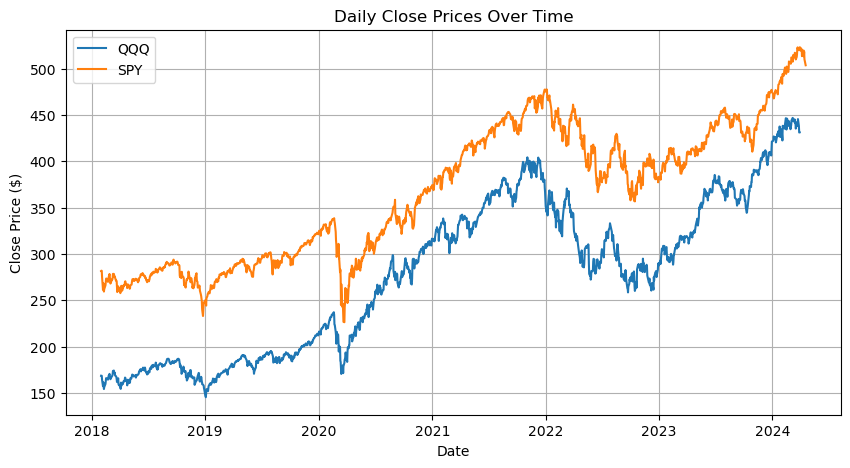

In [53]:
# Grouping by day
qqq_daily = qqq.groupby(qqq['time'].dt.to_period('D')).last()
spy_daily = spy.groupby(spy['time'].dt.to_period('D')).last()

# Plotting the performance over time
plt.figure(figsize = (10,5))

plt.plot(qqq_daily['time'], qqq_daily['close'], label = 'QQQ')
plt.plot(spy_daily['time'], spy_daily['close'], label = 'SPY')
plt.title('Daily Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.legend()

plt.show()

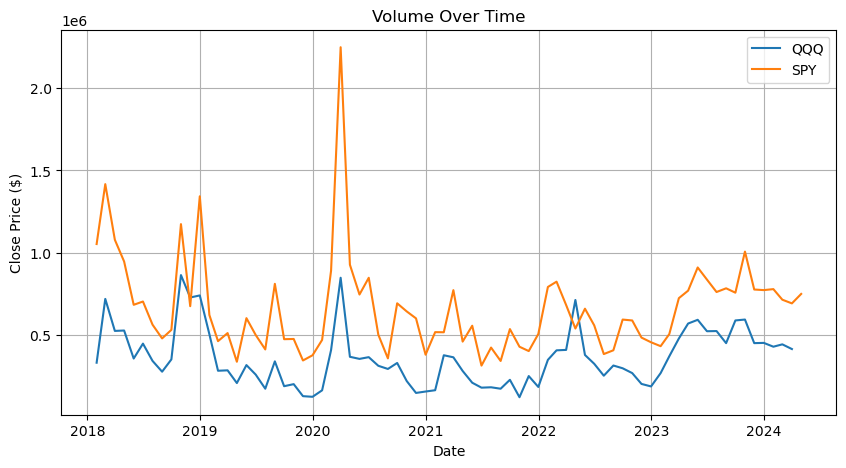

In [81]:
# Monthly volume
qqq_monthly_vol = qqq.groupby(pd.Grouper(key = 'time', freq = 'M')).mean()['Volume']
spy_monthly_vol = spy.groupby(pd.Grouper(key = 'time', freq = 'M')).mean()['Volume']

qqq_monthly_vol = qqq_monthly_vol.reset_index()
spy_monthly_vol = spy_monthly_vol.reset_index()

plt.figure(figsize = (10,5))

plt.plot(qqq_monthly_vol['time'], qqq_monthly_vol['Volume'], label = 'QQQ')
plt.plot(spy_monthly_vol['time'], spy_monthly_vol['Volume'], label = 'SPY')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.grid(True)
plt.legend()

plt.show()

# Feature Engineering